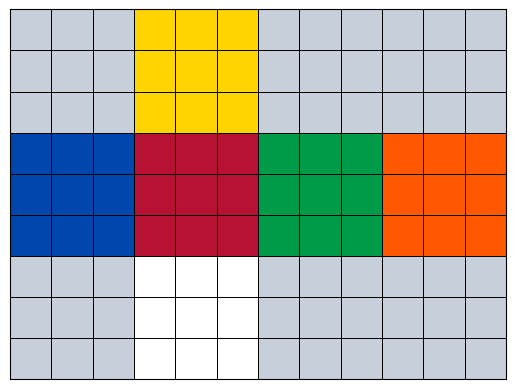

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sympy.combinatorics import Permutation


class RubiksCube():

    colors = {
        'y': np.uint8([255, 213,   0]),     # yellow
        'b': np.uint8([  0,  70, 173]),     # blue
        'r': np.uint8([183,  18,  52]),     # red
        'g': np.uint8([  0, 155,  72]),     # green
        'o': np.uint8([255,  88,   0]),     # orange
        'w': np.uint8([255, 255, 255]),     # white
        'q': np.uint8([199, 208, 218])      # quarzo - background
    }

    def __init__(self):
        self.state = np.array(list("yyyyyyyyybbbbbbbbbrrrrrrrrrgggggggggooooooooowwwwwwwww"))   # starting state
    
    def show(self):
        """
        Display current state of the cube on a 2D colored mesh.
        """

        # creating colored mesh of current state
        faces = self.state.reshape(6, 3, 3)     # an array of size 6 containing current state of faces in matrices of size 3x3
        block_q = np.full((3, 3), 'q')          # background cells
        matrix_form = np.block([[block_q,  faces[0], block_q,  block_q ],
                                [faces[1], faces[2], faces[3], faces[4]],
                                [block_q,  faces[5], block_q,  block_q ]])  # a matrix of size 9x12 built from 3x3 blocks
        mesh_data = [[self.colors[i] for i in row] for row in matrix_form]

        # displaying the colored mesh
        fig, ax = plt.subplots()
        ax.invert_yaxis()   # inverting axis y, so first line will be on top
        ax.set_xticks([])   # no ticks and labels on axis x
        ax.set_yticks([])   # no ticks and labels on axis y
        ax.pcolormesh(mesh_data, edgecolors = 'k', linewidth = 0.5)


    layer_rotations = {
        'F': Permutation(53)(6,17,47,27)(7,14,46,30)(8,11,45,33)(18,24,26,20)(19,21,25,23),     # front - the middle one on the image
        'B': Permutation(53)(0,29,53,15)(1,32,52,12)(2,35,51,9)(36,42,44,38)(37,39,43,41),      # back
        'U': Permutation(53)(0,6,8,2)(1,3,7,5)(9,18,27,36)(10,19,28,37)(11,20,29,38),           # up
        'D': Permutation(53)(15,42,33,24)(16,43,34,25)(17,44,35,26)(45,51,53,47)(46,48,52,50),  # down
        'L': Permutation(53)(0,44,45,18)(3,41,48,21)(6,38,51,24)(9,15,17,11)(10,12,16,14),      # left
        'R': Permutation(53)(2,20,47,42)(5,23,50,39)(8,26,53,36)(27,33,35,29)(28,30,34,32),     # right
        'M': Permutation(53)(1,43,46,19)(4,40,49,22)(7,37,52,25),                               # middle
        'E': Permutation(53)(12,39,30,21)(13,40,31,22)(14,41,32,23),                            # equator
        'S': Permutation(53)(3,16,50,28)(4,13,49,31)(5,10,48,34)                                # standing
    }

    cube_rotations = {
        'X': layer_rotations['R'] * layer_rotations['M']**(-1) * layer_rotations['L']**(-1),    # rotate cube as R
        'Y': layer_rotations['U'] * layer_rotations['E']**(-1) * layer_rotations['D']**(-1),    # rotate cube as U
        'Z': layer_rotations['F'] * layer_rotations['S']       * layer_rotations['B']**(-1)     # rotate cube as F
    }

    base_moves    = {**layer_rotations, **cube_rotations}                           # clockwise rotations
    inverse_moves = {key + "'": value**(-1) for key, value in base_moves.items()}   # counterclockwise rotations, indicated with an "'"
    double_moves  = {key + "2": value**2 for key, value in base_moves.items()}      # double rotations, indicated with a "2"

    all_moves = {**base_moves, **inverse_moves, **double_moves}                     # all possible moves 

    def move(self, move):
        """
        Take a simple move.

        Parameters:
            - move: str
                Valid moves are 'F', 'B', 'U', 'D', 'L', 'R', 'M', 'E', 'S', 'X', 'Y', 'Z' optionally followed by a "'" or a "2".
        """

        assert move in self.all_moves.keys(), f'Argument should be from {list(self.base_moves.keys())} with optionally followed by an "\'" or a "2".'

        permutation = self.all_moves[move]
        self.state = np.array(permutation(self.state))

    def algorithm(self, algorithm = "", iterations = 1):
        """
        Execute an algorithm.

        Parameters:
            - algorithm: str
                A sequence of valid moves separated white whitespaces. 
                Valid moves are 'F', 'B', 'U', 'D', 'L', 'R', 'M', 'E', 'S', 'X', 'Y', 'Z' with optionally followed by an "'" or a "2".
            - iterations: int
                The number of times the algorithm needs to be excecuted.
        """

        assert isinstance(iterations, int), f'Parameter \'iterations\' should be an integer.'
        assert iterations >= 1, f'Parameter \'iterations\' should be a positive number.'

        sequence = algorithm.split()
        sequence = sequence * iterations
        for move in sequence:
            self.move(move)

    def scramble(self, moves = 20):
        """
        Scramble the cube with random moves.

        Parameters:
            - moves: int
                The number of random moves.
        """

        assert isinstance(moves, int), f'Parameter \'moves\' should be an integer.'
        assert moves >= 1, f'Parameter \'moves\' should be a positive number.'

        for i in range(moves):
            move = random.choice(list(self.layer_rotations.keys()))
            self.move(move)


cube = RubiksCube()
cube.show()

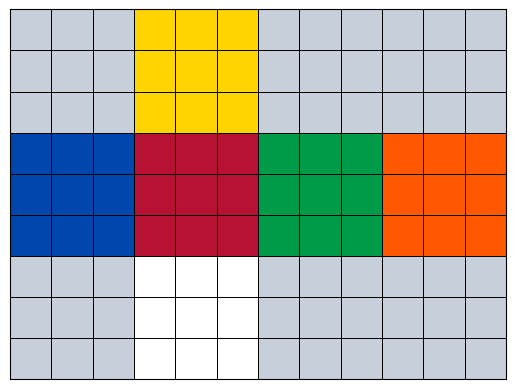

In [27]:
cube.move("F")
cube.show()

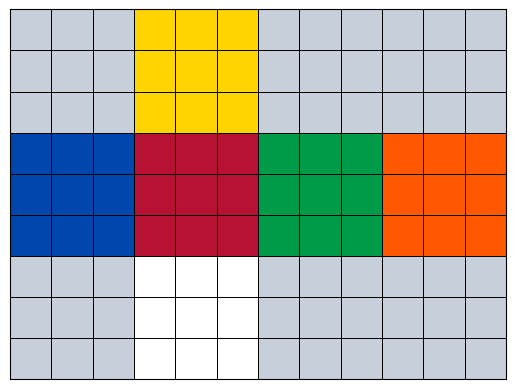

In [29]:
cube.algorithm("U2 D2 F2 B2 L2 R2")
cube.show()

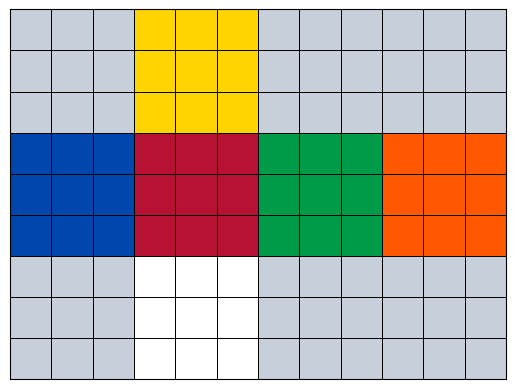

In [32]:
cube.algorithm("D' R' D R D F D' F'", 5) # run it 3 times!
cube.show()

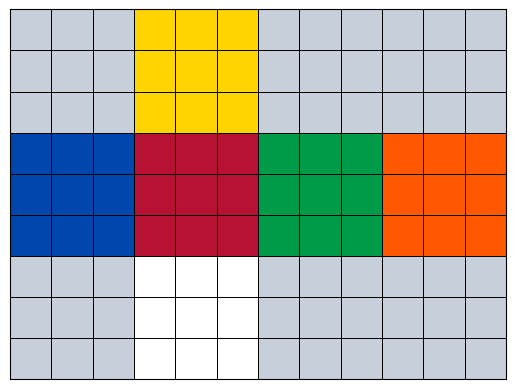

In [35]:
cube.algorithm("R D", 35)  # run it 3 times!
cube.show()

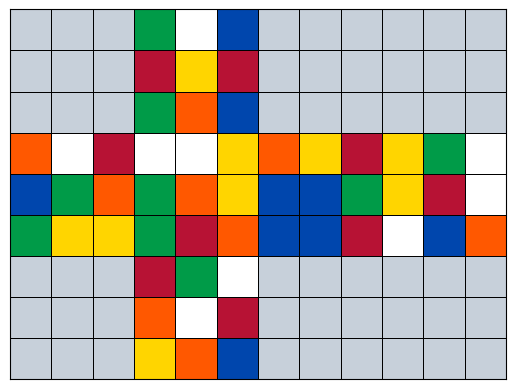

In [45]:
cube.scramble()
cube.show()